In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold


In [3]:
# Load the dataset
df = pd.read_csv('Desktop/ML/merged_output4.csv')  # Assuming the dataset is in CSV format

# Preview the data
print(df.head())

# Check for missing values
print(df.isnull().sum())

          Country ISO3  avg_AirQuality  avg_WaterPollution  temp_rise  \
0  United Kingdom  GBR       70.716382           25.791133      1.482   
1         Finland  FIN       95.771386           19.231145      1.888   
2          Sweden  SWE       82.938708           18.842412      1.478   
3      Luxembourg  LUX       71.818694           45.738636      2.561   
4        Slovenia  SVN       76.656342           22.613987      2.617   

   tree_cover_loss  gross_co2_emission  urban_population  EPI Score  
0     21604.097140        1.080353e+07            84.642       77.7  
1    241781.074100        6.035039e+07            85.773       76.5  
2    313926.314700        9.503004e+07            88.738       72.7  
3       912.823356        5.962327e+05            92.078       72.3  
4      4626.126619        2.874861e+06            56.088       67.3  
Country               0
ISO3                  0
avg_AirQuality        0
avg_WaterPollution    0
temp_rise             5
tree_cover_loss      

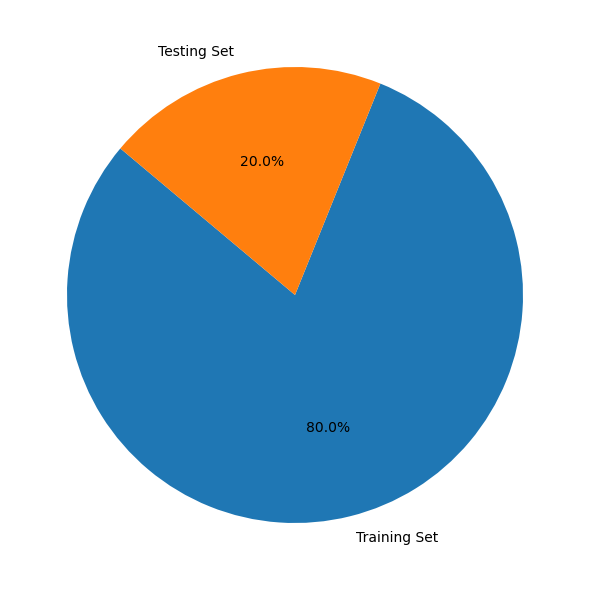

In [19]:
import matplotlib.pyplot as plt

# Dataset split sizes (adjust these values as necessary)
train_size = 0.8  # 80% for training
test_size = 0.2   # 20% for testing

# Labels and sizes for the dataset split
labels_split = ['Training Set', 'Testing Set']
sizes_split = [train_size, test_size]

# Creating a pie chart for dataset split
plt.figure(figsize=(12, 6))

# Pie chart for dataset split
plt.subplot(1, 2, 1)  # Create a 1x2 grid, first subplot
plt.pie(sizes_split, labels=labels_split, autopct='%1.1f%%', startangle=140)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


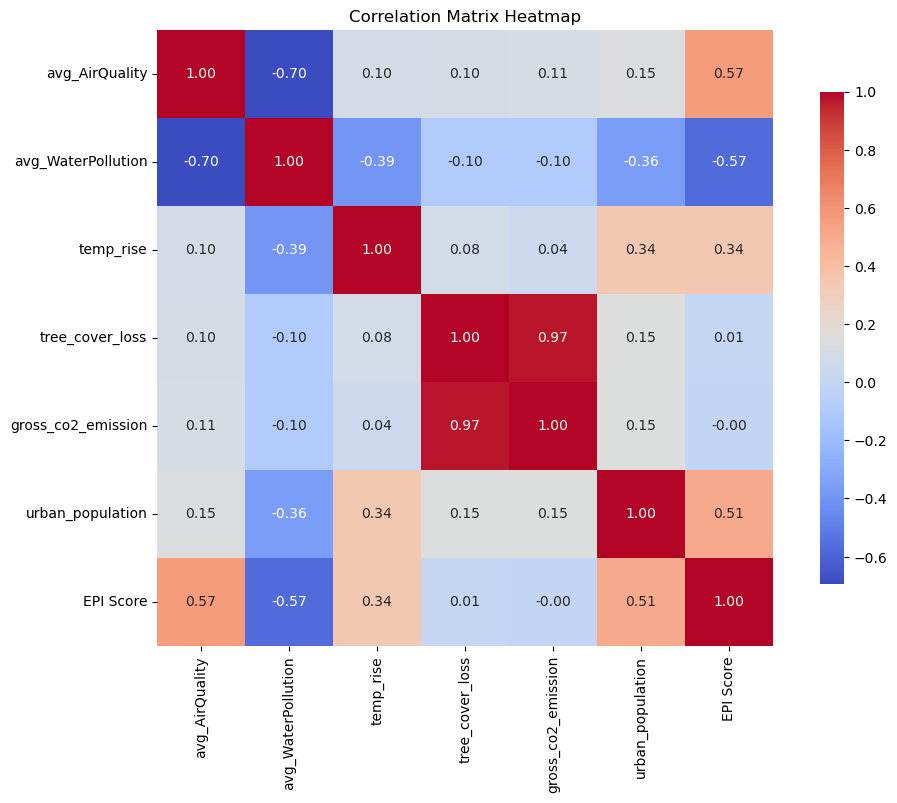

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the dataset

# Step 1: Identify numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])  # Filter for numeric data types

# Step 2: Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Step 3: Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Step 4: Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Add title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()


In [5]:
df['EPI Score'] = df['EPI Score'].map(lambda x: 1 if x > 60 else 0)
df.head()

,Country,ISO3,avg_AirQuality,avg_WaterPollution,temp_rise,tree_cover_loss,gross_co2_emission,urban_population,EPI Score
0,United Kingdom,GBR,70.716382,25.791133,1.482,21604.097140,1.080353e+07,84.642,1
1,Finland,FIN,95.771386,19.231145,1.888,241781.074100,6.035039e+07,85.773,1
2,Sweden,SWE,82.938708,18.842412,1.478,313926.314700,9.503004e+07,88.738,1
3,Luxembourg,LUX,71.818694,45.738636,2.561,912.823356,5.962327e+05,92.078,1
4,Slovenia,SVN,76.656342,22.613987,2.617,4626.126619,2.874861e+06,56.088,1


In [6]:
# Check the data type of the EPI column
print(df['EPI Score'].dtype)

# Display the unique values in the EPI column
print(df['EPI Score'])


int64
0      1
1      1
2      1
3      1
4      1
      ..
146    0
147    0
148    0
149    0
150    0
Name: EPI Score, Length: 151, dtype: int64


In [7]:
# Separate numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns

# Fill missing values in numeric columns with the median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing values in non-numeric columns with the most frequent value (mode)
df[non_numeric_cols] = df[non_numeric_cols].fillna(df[non_numeric_cols].mode().iloc[0])


In [8]:
print(df.isnull().sum())

Country               0
ISO3                  0
avg_AirQuality        0
avg_WaterPollution    0
temp_rise             0
tree_cover_loss       0
gross_co2_emission    0
urban_population      0
EPI Score             0
dtype: int64


In [9]:
# Define features and target variable
X = df[['avg_AirQuality', 'avg_WaterPollution', 'temp_rise', 'tree_cover_loss','gross_co2_emission','urban_population']]  # Example feature columns
y = df['EPI Score']  # This should be your binary target variable (1: threatened, 0: not threatened)

# Normalize the features (logistic regression performs better with scaled features)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [11]:
log_reg=LogisticRegression()

In [12]:
print(y_train.unique())  # Check the unique values in the target variable


[0 1]


In [13]:
log_reg.fit(X_train, y_train)


LogisticRegression()

In [14]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5)

# Output the mean cross-validation score
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


Cross-validation scores: [1.         0.91666667 0.875      0.875      0.91666667]
Mean CV accuracy: 0.9166666666666666


In [15]:
# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9354838709677419
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        29
           1       0.50      0.50      0.50         2

    accuracy                           0.94        31
   macro avg       0.73      0.73      0.73        31
weighted avg       0.94      0.94      0.94        31



In [16]:
# Predict probabilities of habitats being threatened
y_proba = log_reg.predict_proba(X_test)[:, 1]  # Probabilities of being threatened (class 1)
print(y_proba)


[4.60532239e-03 6.81771243e-02 1.05376781e-02 6.49044554e-02
 1.85178795e-04 9.58534895e-02 1.76163968e-03 2.47281572e-02
 1.01770505e-01 1.06056402e-04 2.50357598e-02 6.01037254e-02
 1.00837865e-02 6.36757468e-01 1.34060467e-01 4.94472030e-04
 2.92031573e-04 4.58017556e-04 3.56667103e-05 9.48247964e-05
 1.86964015e-03 1.03140032e-03 1.97124071e-01 3.71167004e-04
 3.46545973e-04 1.69270785e-02 4.66753543e-06 1.16926882e-02
 1.63582945e-03 3.13838657e-02 5.47531249e-01]


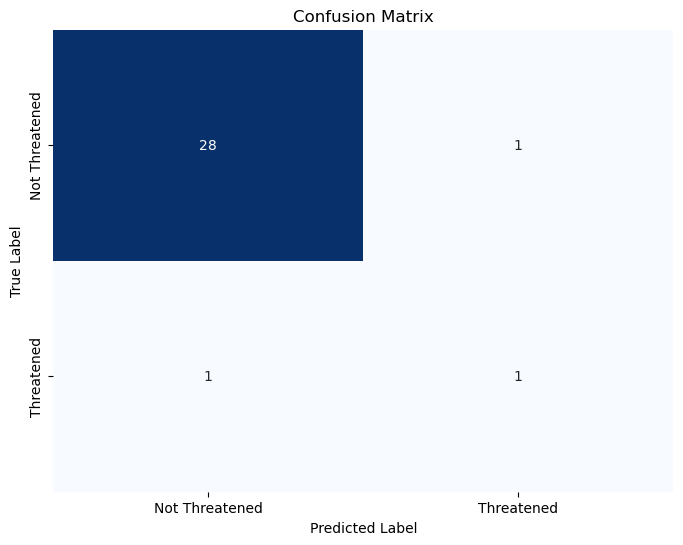

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Threatened', 'Threatened'],
            yticklabels=['Not Threatened', 'Threatened'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


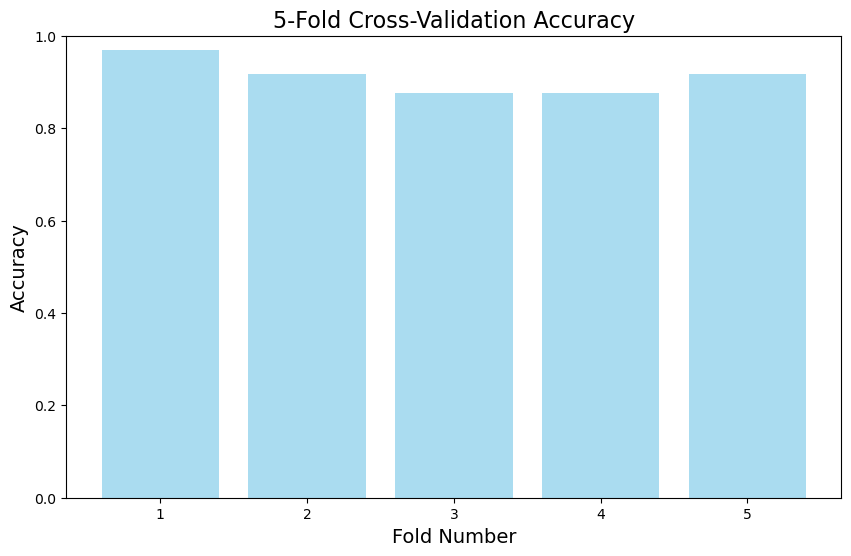

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Sample accuracies for each fold (replace these with your actual values)
fold_accuracies = [0.97,0.91666667,0.875,0.875 ,0.91666667]  # Example values

# Define the number of folds
num_folds = len(fold_accuracies)

# Create an array of fold numbers
folds = np.arange(1, num_folds + 1)

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(folds, fold_accuracies, color='skyblue', alpha=0.7)

# Add labels and title
plt.xlabel('Fold Number', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('5-Fold Cross-Validation Accuracy', fontsize=16)
plt.xticks(folds)  # Set x-ticks to be the fold numbers
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1 (for accuracy)

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.grid(False)
# Optional: Add a grid for better readability
plt.show()
